# CIS 519 Final Project



Intro


Data Source: https://www.kaggle.com/datasets/parisrohan/credit-score-classification


# Main Goal

Build an advanced system based on Machine Learning algorithms to help classify people's credit score

# Loading Packages & Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
# We observe that testing dataset on original website does not have target variables (credit score)
# Therefore, we plan to use training dataset as our whole dataset. Also, in future steps we will do train-test-validation split.
import csv
df = pd.read_csv("train_dataset.csv")


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Data cleaning & Preprocessing

In [3]:
df.shape

(100000, 28)

In [4]:
## make a copy of dataset in case we modify the original data

df_copy = df


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
# Show statistics of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [7]:
df.describe(include="O").T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


From statistics above, we can see that there are many outliers and strange values in several columns. We should deal with that in next steps.

In [8]:
df["Monthly_Balance"] = df["Monthly_Balance"].replace("__-333333333333333333333333333__", 0)
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].replace("__10000__", 10000)

In [9]:
# We see that there are some column values with sign "#, $, @", and we should change it to '' for better prediction
def sign_replace(x):
  #x = x.str
  x.str.replace(r"_$", "", regex=True)

In [10]:
df.head(25)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [11]:
#df['Age'] = df['Age'].apply(sign_replace)
#df['Annual_Income'] = df['Annual_Income'].apply(sign_replace)
df["Age"] = df["Age"].str.replace(r"_$", "", regex=True)

In [12]:
sign_related_col = ['Age', 'Annual_Income', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Num_of_Loan']

In [13]:
for col in sign_related_col:
  df[col] = df[col].str.replace(r"_$", "", regex=True)

In [14]:
df.head(25)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [15]:
df.describe(include="O").T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1728,38,2994
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,13487,17816.75,16
Num_of_Loan,100000,414,3,15104
Type_of_Loan,88592,6260,Not Specified,1408


In [16]:
# Drop unuseful columns
df.drop(columns = ['ID', 'Customer_ID', 'Name', 'SSN'], inplace = True)

In [17]:
# Some more strange values to deal with
df["Changed_Credit_Limit"].replace("_", 0, inplace = True)


In [18]:
# Credit Mix: 

In [19]:
df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [20]:
# Do not want to drop this column since meaningful and too many people do not give their info -- categorize as 'unknown', do encoding later
df["Credit_Mix"].replace("_", "Unknown", inplace = True)

In [21]:
df["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [22]:
# Fill with all medium cases
df["Payment_Behaviour"].replace("!@9#%8", "Medium_spent_Medium_value_payments", inplace = True)

In [23]:
# Deal with occupation
df["Occupation"].value_counts()
df["Occupation"] = df["Occupation"].replace("_______", np.nan)

In [24]:
# Change column types

type_float_col = ['Monthly_Balance', 'Annual_Income', 'Amount_invested_monthly', 'Outstanding_Debt', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Num_of_Loan', 'Changed_Credit_Limit', 'Interest_Rate']

for col in type_float_col:
  df[col] = df[col].astype("float64")


In [25]:
# Change column types

type_int_col = ['Age', 'Num_of_Loan']

for col in type_int_col:
  df[col] = df[col].astype("int64")


In [26]:
df.dtypes

Month                        object
Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate               float64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [27]:
# Verified: have changed to float64 / int64

In [28]:
pd.set_option('max_columns', None)

In [29]:
df.head(25)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,Unknown,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23,Scientist,19114.12,NaN,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,0.00,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23,Scientist,19114.12,NaN,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,June,23,Scientist,19114.12,NaN,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4.0,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,Medium_spent_Medium_value_payments,340.479212,Good
6,July,23,Scientist,19114.12,1824.843333,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8.0,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,August,23,Scientist,19114.12,1824.843333,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6.0,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,January,28,NaN,34847.84,3037.986667,2,4,6.0,1,Credit-Builder Loan,3,4.0,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,February,28,Teacher,34847.84,3037.986667,2,4,6.0,1,Credit-Builder Loan,7,1.0,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good


In [30]:
df['Interest_Rate'] /= 100 # -- change it to decimal

In [31]:
df["Credit_History_Age_Year_Length"] = df["Credit_History_Age"].str.split(" ", expand=True)[0]
df["Credit_History_Age_Month_length"] = df["Credit_History_Age"].str.split(" ", expand=True)[3]

In [32]:
df.dtypes

Month                               object
Age                                  int64
Occupation                          object
Annual_Income                      float64
Monthly_Inhand_Salary              float64
Num_Bank_Accounts                    int64
Num_Credit_Card                      int64
Interest_Rate                      float64
Num_of_Loan                          int64
Type_of_Loan                        object
Delay_from_due_date                  int64
Num_of_Delayed_Payment             float64
Changed_Credit_Limit               float64
Num_Credit_Inquiries               float64
Credit_Mix                          object
Outstanding_Debt                   float64
Credit_Utilization_Ratio           float64
Credit_History_Age                  object
Payment_of_Min_Amount               object
Total_EMI_per_month                float64
Amount_invested_monthly            float64
Payment_Behaviour                   object
Monthly_Balance                    float64
Credit_Scor

In [33]:
df['Credit_History_Age_Year_Length'] = df['Credit_History_Age_Year_Length'].astype("float64")
df['Credit_History_Age_Month_length'] = df['Credit_History_Age_Month_length'].astype("float64")

In [34]:
df.dtypes

Month                               object
Age                                  int64
Occupation                          object
Annual_Income                      float64
Monthly_Inhand_Salary              float64
Num_Bank_Accounts                    int64
Num_Credit_Card                      int64
Interest_Rate                      float64
Num_of_Loan                          int64
Type_of_Loan                        object
Delay_from_due_date                  int64
Num_of_Delayed_Payment             float64
Changed_Credit_Limit               float64
Num_Credit_Inquiries               float64
Credit_Mix                          object
Outstanding_Debt                   float64
Credit_Utilization_Ratio           float64
Credit_History_Age                  object
Payment_of_Min_Amount               object
Total_EMI_per_month                float64
Amount_invested_monthly            float64
Payment_Behaviour                   object
Monthly_Balance                    float64
Credit_Scor

In [35]:
df["Credit_History_Age_Length"] = df["Credit_History_Age_Year_Length"] + df["Credit_History_Age_Month_length"] / 12
df["Credit_History_Age_Length"] = df["Credit_History_Age_Length"].round(1)

In [36]:
df.drop(columns = ['Credit_History_Age_Year_Length', 'Credit_History_Age_Month_length'], inplace = True)

In [37]:
df.drop(columns = ['Credit_History_Age'], inplace = True)

In [38]:
df.head(25)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Length
0,January,23,Scientist,19114.12,1824.843333,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,Unknown,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,22.1
1,February,23,Scientist,19114.12,NaN,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,NaN
2,March,-500,Scientist,19114.12,NaN,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,0.00,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,22.2
3,April,23,Scientist,19114.12,NaN,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,22.3
4,May,23,Scientist,19114.12,1824.843333,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,22.4
5,June,23,Scientist,19114.12,NaN,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4.0,9.27,4.0,Good,809.98,27.262259,No,49.574949,62.430172,Medium_spent_Medium_value_payments,340.479212,Good,22.5
6,July,23,Scientist,19114.12,1824.843333,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8.0,11.27,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,22.6
7,August,23,Scientist,19114.12,1824.843333,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6.0,11.27,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,NaN
8,January,28,NaN,34847.84,3037.986667,2,4,0.06,1,Credit-Builder Loan,3,4.0,5.42,2.0,Good,605.03,24.464031,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard,26.6
9,February,28,Teacher,34847.84,3037.986667,2,4,0.06,1,Credit-Builder Loan,7,1.0,7.42,2.0,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,26.7


In [39]:
# Deal with outliers
df['Age'].describe()

count    100000.000000
mean        110.649700
std         686.244717
min        -500.000000
25%          24.000000
50%          33.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

In [40]:
df['Age'].value_counts()

38      2994
28      2968
31      2955
26      2945
32      2884
        ... 
1908       1
4583       1
7549       1
3119       1
1342       1
Name: Age, Length: 1728, dtype: int64

In [41]:
for age in df.Age.values:
    # We set this range for people who are more probable to use credit cards in their lives
    if (age >= 90) | (age < 18):
      df['Age'].replace(age, np.median(df['Age']), inplace=True)

In [42]:
df['Age'].describe()
# This looks nice

count    100000.000000
mean         34.305350
std           9.683062
min          18.000000
25%          27.000000
50%          33.000000
75%          41.000000
max          56.000000
Name: Age, dtype: float64

In [43]:
df['Interest_Rate'].describe()

count    100000.000000
mean          0.724660
std           4.664226
min           0.010000
25%           0.080000
50%           0.130000
75%           0.200000
max          57.970000
Name: Interest_Rate, dtype: float64

In [44]:
for interest in df['Interest_Rate'].values:
    # We set this range for people who are more probable to use credit cards in their lives
    if (interest >= 0.25) | (interest <= 0):
      df['Interest_Rate'].replace(interest, np.median(df['Interest_Rate']), inplace=True)

In [45]:
df['Interest_Rate'].describe()

count    100000.000000
mean          0.118962
std           0.056311
min           0.010000
25%           0.080000
50%           0.130000
75%           0.160000
max           0.240000
Name: Interest_Rate, dtype: float64

In [46]:
df['Credit_History_Age_Length'].describe()
# This looks nice

count    90970.000000
mean        18.432423
std          8.311667
min          0.100000
25%         12.000000
50%         18.200000
75%         25.200000
max         33.700000
Name: Credit_History_Age_Length, dtype: float64

In [47]:
df['Monthly_Balance'].describe() # Looks good

count    98800.000000
mean       402.514588
std        213.950252
min          0.000000
25%        270.092209
50%        336.719190
75%        470.220186
max       1602.040519
Name: Monthly_Balance, dtype: float64

In [48]:
df['Annual_Income'].describe() # Also looks good

count    1.000000e+05
mean     1.764157e+05
std      1.429618e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

In [49]:
df['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [50]:
for num_card in df['Num_Credit_Card'].values:
    if (num_card >= 20) | (num_card <= 0):
      df['Num_Credit_Card'].replace(num_card, np.median(df['Num_Credit_Card']), inplace=True)

In [51]:
df['Num_Bank_Accounts'].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [52]:
for num_acc in df['Num_Bank_Accounts'].values:
    if (num_acc >= 20) | (num_acc <= 0):
      df['Num_Bank_Accounts'].replace(num_acc, np.median(df['Num_Bank_Accounts']), inplace=True)

In [53]:
df.head(25)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Length
0,January,23,Scientist,19114.12,1824.843333,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,Unknown,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,22.1
1,February,23,Scientist,19114.12,NaN,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,NaN
2,March,33,Scientist,19114.12,NaN,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,0.00,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,22.2
3,April,23,Scientist,19114.12,NaN,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,22.3
4,May,23,Scientist,19114.12,1824.843333,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,22.4
5,June,23,Scientist,19114.12,NaN,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4.0,9.27,4.0,Good,809.98,27.262259,No,49.574949,62.430172,Medium_spent_Medium_value_payments,340.479212,Good,22.5
6,July,23,Scientist,19114.12,1824.843333,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8.0,11.27,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,22.6
7,August,23,Scientist,19114.12,1824.843333,3,4,0.03,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6.0,11.27,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,NaN
8,January,28,NaN,34847.84,3037.986667,2,4,0.06,1,Credit-Builder Loan,3,4.0,5.42,2.0,Good,605.03,24.464031,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard,26.6
9,February,28,Teacher,34847.84,3037.986667,2,4,0.06,1,Credit-Builder Loan,7,1.0,7.42,2.0,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,26.7


In [54]:
df.isna().sum()

Month                            0
Age                              0
Occupation                    7062
Annual_Income                    0
Monthly_Inhand_Salary        15002
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Type_of_Loan                 11408
Delay_from_due_date              0
Num_of_Delayed_Payment        7002
Changed_Credit_Limit             0
Num_Credit_Inquiries          1965
Credit_Mix                       0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly       4479
Payment_Behaviour                0
Monthly_Balance               1200
Credit_Score                     0
Credit_History_Age_Length     9030
dtype: int64

In [55]:
df.dtypes

Month                         object
Age                            int64
Occupation                    object
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                float64
Num_of_Loan                    int64
Type_of_Loan                  object
Delay_from_due_date            int64
Num_of_Delayed_Payment       float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Credit_Mix                    object
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Payment_Behaviour             object
Monthly_Balance              float64
Credit_Score                  object
Credit_History_Age_Length    float64
dtype: object

In [56]:
# Fill na values with categorical values 
# We can use most frequent or random choice from other possible values
df['Occupation'] = df['Occupation'].fillna(np.random.choice(pd.Series(['Lawyer', 'Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer', 'Media_Manager', 'Doctor', 'Journalist', 
                                                                       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'])))

In [57]:
df.isna().sum()

Month                            0
Age                              0
Occupation                       0
Annual_Income                    0
Monthly_Inhand_Salary        15002
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Type_of_Loan                 11408
Delay_from_due_date              0
Num_of_Delayed_Payment        7002
Changed_Credit_Limit             0
Num_Credit_Inquiries          1965
Credit_Mix                       0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly       4479
Payment_Behaviour                0
Monthly_Balance               1200
Credit_Score                     0
Credit_History_Age_Length     9030
dtype: int64

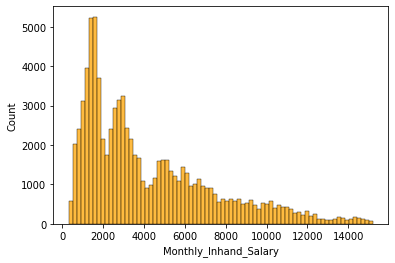

In [58]:
sns.histplot(df.Monthly_Inhand_Salary, color = 'orange')


In [59]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(method='pad') # fill missing value by nearby columns

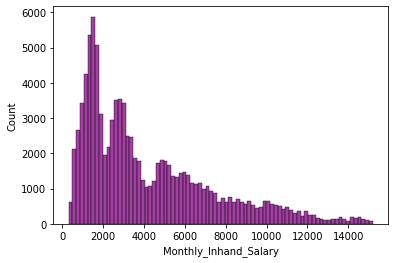

In [60]:
sns.histplot(df.Monthly_Inhand_Salary, color = 'purple') # See the change

In [61]:
# Similarly, we can fill missing values for other numerical columns

df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(method='pad') # fill missing value by nearby columns
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(method='pad') # fill missing value by nearby columns
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(method='pad') # fill missing value by nearby columns
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(method='pad') # fill missing value by nearby columns

In [62]:
df['Credit_History_Age_Length'] = df['Credit_History_Age_Length'].fillna(method='pad') # fill missing value by nearby columns

In [63]:
df.isna().sum()

Month                            0
Age                              0
Occupation                       0
Annual_Income                    0
Monthly_Inhand_Salary            0
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Type_of_Loan                 11408
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Changed_Credit_Limit             0
Num_Credit_Inquiries             0
Credit_Mix                       0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly          0
Payment_Behaviour                0
Monthly_Balance                  0
Credit_Score                     0
Credit_History_Age_Length        0
dtype: int64

In [64]:
# Column: Type_of_Loan a little complex and not much useful for modeling -- drop this column
df.drop(columns = 'Type_of_Loan', inplace = True)

In [65]:
df.isna().sum()

Month                        0
Age                          0
Occupation                   0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Length    0
dtype: int64

In [66]:
df.shape

(100000, 23)

In [67]:
df.head(25)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Length
0,January,23,Scientist,19114.12,1824.843333,3,4,0.03,4,3,7.0,11.27,4.0,Unknown,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,22.1
1,February,23,Scientist,19114.12,1824.843333,3,4,0.03,4,-1,7.0,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,22.1
2,March,33,Scientist,19114.12,1824.843333,3,4,0.03,4,3,7.0,0.00,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,22.2
3,April,23,Scientist,19114.12,1824.843333,3,4,0.03,4,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,22.3
4,May,23,Scientist,19114.12,1824.843333,3,4,0.03,4,6,4.0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,22.4
5,June,23,Scientist,19114.12,1824.843333,3,4,0.03,4,8,4.0,9.27,4.0,Good,809.98,27.262259,No,49.574949,62.430172,Medium_spent_Medium_value_payments,340.479212,Good,22.5
6,July,23,Scientist,19114.12,1824.843333,3,4,0.03,4,3,8.0,11.27,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,22.6
7,August,23,Scientist,19114.12,1824.843333,3,4,0.03,4,3,6.0,11.27,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,22.6
8,January,28,Manager,34847.84,3037.986667,2,4,0.06,1,3,4.0,5.42,2.0,Good,605.03,24.464031,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard,26.6
9,February,28,Teacher,34847.84,3037.986667,2,4,0.06,1,7,1.0,7.42,2.0,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,26.7


In [68]:
df['Num_of_Loan'].describe()

count    100000.000000
mean          3.009960
std          62.647879
min        -100.000000
25%           1.000000
50%           3.000000
75%           5.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64

In [69]:
# forget to deal with num_loan:
for num_loan in df['Num_of_Loan'].values:
    if (num_loan >= 20) | (num_loan <= 0):
      df['Num_of_Loan'].replace(num_loan, np.median(df['Num_of_Loan']), inplace=True)

In [70]:
df.head(25)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Length
0,January,23,Scientist,19114.12,1824.843333,3,4,0.03,4,3,7.0,11.27,4.0,Unknown,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,22.1
1,February,23,Scientist,19114.12,1824.843333,3,4,0.03,4,-1,7.0,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,22.1
2,March,33,Scientist,19114.12,1824.843333,3,4,0.03,4,3,7.0,0.00,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,22.2
3,April,23,Scientist,19114.12,1824.843333,3,4,0.03,4,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,22.3
4,May,23,Scientist,19114.12,1824.843333,3,4,0.03,4,6,4.0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,22.4
5,June,23,Scientist,19114.12,1824.843333,3,4,0.03,4,8,4.0,9.27,4.0,Good,809.98,27.262259,No,49.574949,62.430172,Medium_spent_Medium_value_payments,340.479212,Good,22.5
6,July,23,Scientist,19114.12,1824.843333,3,4,0.03,4,3,8.0,11.27,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,22.6
7,August,23,Scientist,19114.12,1824.843333,3,4,0.03,4,3,6.0,11.27,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,22.6
8,January,28,Manager,34847.84,3037.986667,2,4,0.06,1,3,4.0,5.42,2.0,Good,605.03,24.464031,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard,26.6
9,February,28,Teacher,34847.84,3037.986667,2,4,0.06,1,7,1.0,7.42,2.0,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,26.7


In [71]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [72]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', np.nan)
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

In [73]:
df.head(25)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Length
0,January,23,Scientist,19114.12,1824.843333,3,4,0.03,4,3,7.0,11.27,4.0,Unknown,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,22.1
1,February,23,Scientist,19114.12,1824.843333,3,4,0.03,4,-1,7.0,11.27,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,22.1
2,March,33,Scientist,19114.12,1824.843333,3,4,0.03,4,3,7.0,0.00,4.0,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,22.2
3,April,23,Scientist,19114.12,1824.843333,3,4,0.03,4,5,4.0,6.27,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,22.3
4,May,23,Scientist,19114.12,1824.843333,3,4,0.03,4,6,4.0,11.27,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,22.4
5,June,23,Scientist,19114.12,1824.843333,3,4,0.03,4,8,4.0,9.27,4.0,Good,809.98,27.262259,No,49.574949,62.430172,Medium_spent_Medium_value_payments,340.479212,Good,22.5
6,July,23,Scientist,19114.12,1824.843333,3,4,0.03,4,3,8.0,11.27,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,22.6
7,August,23,Scientist,19114.12,1824.843333,3,4,0.03,4,3,6.0,11.27,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,22.6
8,January,28,Manager,34847.84,3037.986667,2,4,0.06,1,3,4.0,5.42,2.0,Good,605.03,24.464031,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard,26.6
9,February,28,Teacher,34847.84,3037.986667,2,4,0.06,1,7,1.0,7.42,2.0,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,26.7


In [74]:
# Encoding for categorical variables

label_encoder = LabelEncoder()

# Columns related: 'Credit_Score', 'Occupation', 'Month', 'Credit_Mix', 'Payment_Behaviour', 'Payment_of_Min_Amount'
df['Credit_Score']=label_encoder.fit_transform(df['Credit_Score'])
df['Occupation']=label_encoder.fit_transform(df['Occupation'])
df['Month']=label_encoder.fit_transform(df['Month'])
df['Credit_Mix']=label_encoder.fit_transform(df['Credit_Mix'])
df['Payment_Behaviour']=label_encoder.fit_transform(df['Payment_Behaviour'])
df['Payment_of_Min_Amount']=label_encoder.fit_transform(df['Payment_of_Min_Amount'])

In [75]:
df.head(25)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Length
0,3,23,12,19114.12,1824.843333,3,4,0.03,4,3,7.0,11.27,4.0,3,809.98,26.822620,0,49.574949,80.415295,2,312.494089,0,22.1
1,2,23,12,19114.12,1824.843333,3,4,0.03,4,-1,7.0,11.27,4.0,1,809.98,31.944960,0,49.574949,118.280222,3,284.629162,0,22.1
2,6,33,12,19114.12,1824.843333,3,4,0.03,4,3,7.0,0.00,4.0,1,809.98,28.609352,0,49.574949,81.699521,4,331.209863,0,22.2
3,0,23,12,19114.12,1824.843333,3,4,0.03,4,5,4.0,6.27,4.0,1,809.98,31.377862,0,49.574949,199.458074,5,223.451310,0,22.3
4,7,23,12,19114.12,1824.843333,3,4,0.03,4,6,4.0,11.27,4.0,1,809.98,24.797347,0,49.574949,41.420153,1,341.489231,0,22.4
5,5,23,12,19114.12,1824.843333,3,4,0.03,4,8,4.0,9.27,4.0,1,809.98,27.262259,0,49.574949,62.430172,6,340.479212,0,22.5
6,4,23,12,19114.12,1824.843333,3,4,0.03,4,3,8.0,11.27,4.0,1,809.98,22.537593,0,49.574949,178.344067,5,244.565317,0,22.6
7,1,23,12,19114.12,1824.843333,3,4,0.03,4,3,6.0,11.27,4.0,1,809.98,23.933795,0,49.574949,24.785217,1,358.124168,2,22.6
8,3,28,8,34847.84,3037.986667,2,4,0.06,1,3,4.0,5.42,2.0,1,605.03,24.464031,0,18.816215,104.291825,5,470.690627,2,26.6
9,2,28,13,34847.84,3037.986667,2,4,0.06,1,7,1.0,7.42,2.0,1,605.03,38.550848,0,18.816215,40.391238,0,484.591214,0,26.7


In [76]:
df = df.round(2)

In [77]:
df.head(25)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Length
0,3,23,12,19114.12,1824.84,3,4,0.03,4,3,7.0,11.27,4.0,3,809.98,26.82,0,49.57,80.42,2,312.49,0,22.1
1,2,23,12,19114.12,1824.84,3,4,0.03,4,-1,7.0,11.27,4.0,1,809.98,31.94,0,49.57,118.28,3,284.63,0,22.1
2,6,33,12,19114.12,1824.84,3,4,0.03,4,3,7.0,0.00,4.0,1,809.98,28.61,0,49.57,81.70,4,331.21,0,22.2
3,0,23,12,19114.12,1824.84,3,4,0.03,4,5,4.0,6.27,4.0,1,809.98,31.38,0,49.57,199.46,5,223.45,0,22.3
4,7,23,12,19114.12,1824.84,3,4,0.03,4,6,4.0,11.27,4.0,1,809.98,24.80,0,49.57,41.42,1,341.49,0,22.4
5,5,23,12,19114.12,1824.84,3,4,0.03,4,8,4.0,9.27,4.0,1,809.98,27.26,0,49.57,62.43,6,340.48,0,22.5
6,4,23,12,19114.12,1824.84,3,4,0.03,4,3,8.0,11.27,4.0,1,809.98,22.54,0,49.57,178.34,5,244.57,0,22.6
7,1,23,12,19114.12,1824.84,3,4,0.03,4,3,6.0,11.27,4.0,1,809.98,23.93,0,49.57,24.79,1,358.12,2,22.6
8,3,28,8,34847.84,3037.99,2,4,0.06,1,3,4.0,5.42,2.0,1,605.03,24.46,0,18.82,104.29,5,470.69,2,26.6
9,2,28,13,34847.84,3037.99,2,4,0.06,1,7,1.0,7.42,2.0,1,605.03,38.55,0,18.82,40.39,0,484.59,0,26.7


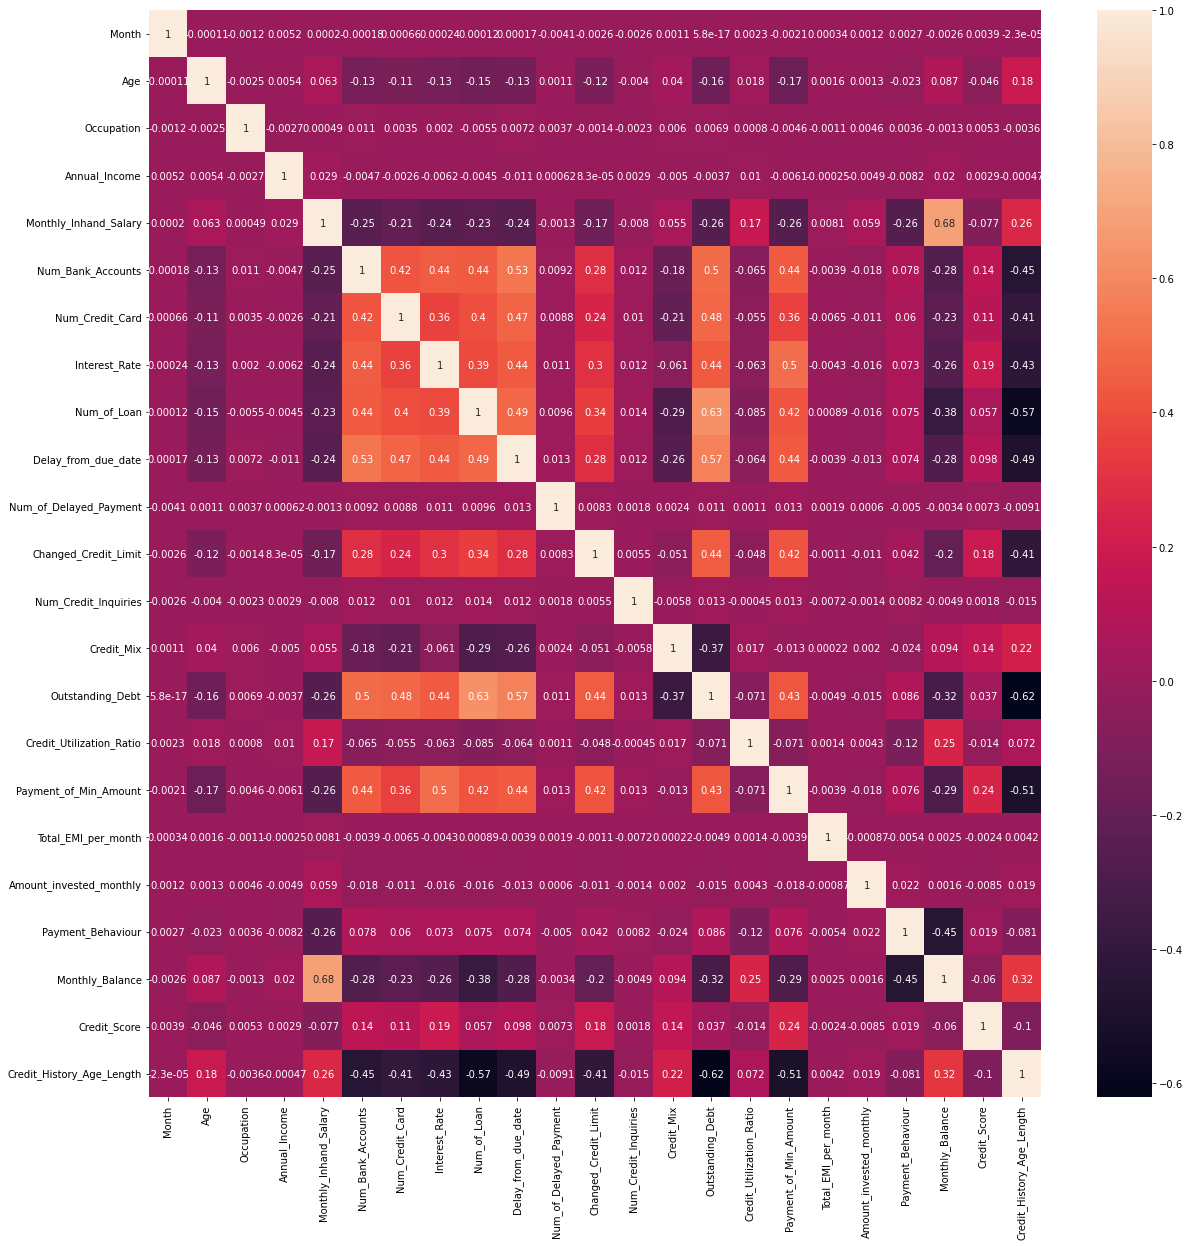

In [78]:
# Make a heatmap to know the correlation between all features
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt = '.2g')

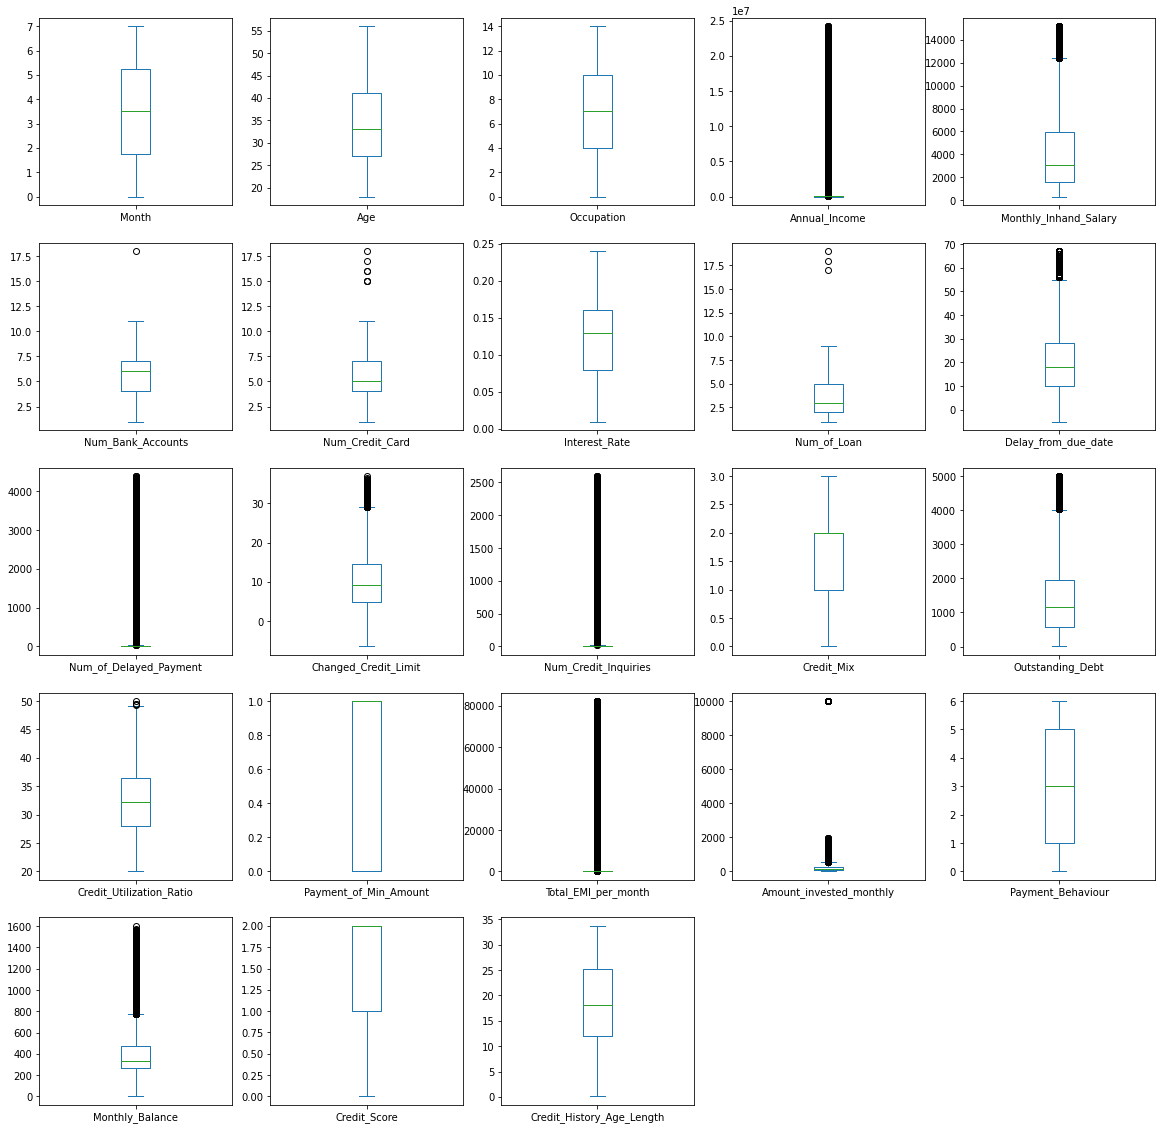

In [79]:
# Detect outliers

df.plot(subplots = True, kind = "box", figsize = (20,20) ,  layout = (5,5))
plt.show()

In [80]:
df.shape

(100000, 23)

In [81]:
#df.to_csv('cleaned_dataset.csv')

# Modeling



## Train-Test-Split

In [82]:
features = df.loc[:, df.columns != 'Credit_Score']


# Store the binary classification target variable as "labels"

labels = df['Credit_Score'] # label should have 3 values

In [83]:
features.shape

(100000, 22)

In [84]:
labels.shape

(100000,)

In [85]:
df = pd.concat([features, labels], axis = 1)

In [86]:
df.head(25)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Length,Credit_Score
0,3,23,12,19114.12,1824.84,3,4,0.03,4,3,7.0,11.27,4.0,3,809.98,26.82,0,49.57,80.42,2,312.49,22.1,0
1,2,23,12,19114.12,1824.84,3,4,0.03,4,-1,7.0,11.27,4.0,1,809.98,31.94,0,49.57,118.28,3,284.63,22.1,0
2,6,33,12,19114.12,1824.84,3,4,0.03,4,3,7.0,0.00,4.0,1,809.98,28.61,0,49.57,81.70,4,331.21,22.2,0
3,0,23,12,19114.12,1824.84,3,4,0.03,4,5,4.0,6.27,4.0,1,809.98,31.38,0,49.57,199.46,5,223.45,22.3,0
4,7,23,12,19114.12,1824.84,3,4,0.03,4,6,4.0,11.27,4.0,1,809.98,24.80,0,49.57,41.42,1,341.49,22.4,0
5,5,23,12,19114.12,1824.84,3,4,0.03,4,8,4.0,9.27,4.0,1,809.98,27.26,0,49.57,62.43,6,340.48,22.5,0
6,4,23,12,19114.12,1824.84,3,4,0.03,4,3,8.0,11.27,4.0,1,809.98,22.54,0,49.57,178.34,5,244.57,22.6,0
7,1,23,12,19114.12,1824.84,3,4,0.03,4,3,6.0,11.27,4.0,1,809.98,23.93,0,49.57,24.79,1,358.12,22.6,2
8,3,28,8,34847.84,3037.99,2,4,0.06,1,3,4.0,5.42,2.0,1,605.03,24.46,0,18.82,104.29,5,470.69,26.6,2
9,2,28,13,34847.84,3037.99,2,4,0.06,1,7,1.0,7.42,2.0,1,605.03,38.55,0,18.82,40.39,0,484.59,26.7,0


In [87]:
df.shape

(100000, 23)

In [88]:
# TO-DO: Assign appropriate value to seed and conduct 80/20 train-test split with random_state = seed

seed = 42

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=seed)


## Imbalanced Data

In [89]:
# If we use SMOTE to deal with the imbalanced data
labels.value_counts(normalize = True)

2    0.53174
1    0.28998
0    0.17828
Name: Credit_Score, dtype: float64

In [91]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(sampling_strategy='auto')
X_smo, y_smo = smo.fit_resample(features, labels)

In [92]:
y_smo.value_counts(normalize=True)

0    0.333333
2    0.333333
1    0.333333
Name: Credit_Score, dtype: float64

In [93]:
X_train_smo, X_test_smo, y_train_smo, y_test_smo = train_test_split(X_smo, y_smo, test_size=0.2, random_state=42,stratify=y_smo)

In [94]:
from sklearn.preprocessing import PowerTransformer

In [95]:
yj_scale = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train_smo)
X_train_smo = yj_scale.transform(X_train_smo)
X_test_smo = yj_scale.transform(X_test_smo)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


## Logistic Regression


In [109]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
# TO-DO: Find the accuracy and store the value in `log_acc`
log_acc = log_reg.score(x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
log_acc

0.5512

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [113]:
log_reg_scaled = LogisticRegression().fit(x_train_scaled, y_train)
y_pred_scaled = log_reg_scaled.predict(x_test_scaled)

log_acc_scaled = log_reg_scaled.score(x_test_scaled, y_test)

In [114]:
log_acc_scaled

0.62835

In [116]:
scaler = MinMaxScaler()
x_train_smo_scaled = scaler.fit_transform(X_train_smo)
x_test_smo_scaled = scaler.transform(X_test_smo)

log_reg_smo_scaled = LogisticRegression().fit(x_train_smo_scaled, y_train_smo)
y_pred_smo_scaled = log_reg_smo_scaled.predict(x_test_smo_scaled)

log_acc_smo_scaled = log_reg_smo_scaled.score(x_test_smo_scaled, y_test_smo)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [117]:
log_acc_smo_scaled

0.6776367340542234

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
sc.fit(x_train)
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)


pca = PCA()
pca_dim = pca.fit(x_train_sc)

In [ ]:
explained_variance_ratios = pca_dim.explained_variance_ratio_
cum_evr = np.cumsum(explained_variance_ratios)

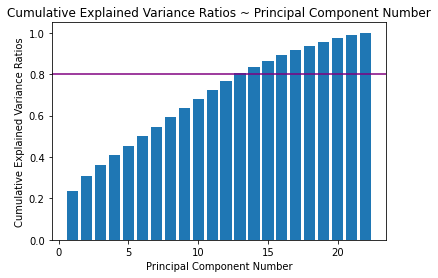

In [ ]:
plt.bar(range(1,1 + len(cum_evr)), cum_evr)
plt.axhline(0.8, color='purple') # add a horizontal line to a plot
plt.xlabel('Principal Component Number')
plt.ylabel('Cumulative Explained Variance Ratios')
#plt.legend(loc='best')
plt.title('Cumulative Explained Variance Ratios ~ Principal Component Number')
plt.show()

According to the plot above, n_components should be set to 13.

In [ ]:
# n_components = 13 should be proper
pca_final = PCA(n_components=10)
pca_final.fit(x_train_sc)

x_test_pca = pca_final.transform(x_test_sc)

In [ ]:
log_reg_pca = LogisticRegression().fit(pca_final.transform(x_train_sc), y_train)
y_pred = log_reg_pca.predict(x_test_pca)
test_accuracy = log_reg_pca.score(x_test_pca, y_test)

In [ ]:
test_accuracy

0.5873

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train_scaled, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train_scaled, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.63


In [ ]:
k_val = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
acc_score_test = []
for k in k_val:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train_scaled, y_train)
  acc_score_test.append(knn.score(x_test_scaled, y_test))


In [ ]:
acc_score_test

[0.61555,
 0.59655,
 0.6343,
 0.64505,
 0.6486,
 0.6585,
 0.65735,
 0.6619,
 0.65985,
 0.66655,
 0.6612,
 0.6642,
 0.6615,
 0.6664,
 0.6639]

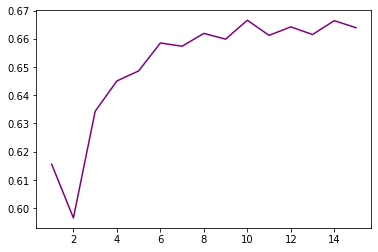

In [ ]:
plt.plot(k_val, acc_score_test, c = 'purple')

Optimal k: k = 10, test_accuracy = 0.67

## XGBoost

In [ ]:
df['Credit_Score'].value_counts()

2    53174
1    28998
0    17828
Name: Credit_Score, dtype: int64

In [97]:
def feature_importance_selection(num, col, top=-1):
    i = num
    i, col = zip(*sorted(list(zip(i, col))))

    if -1 == top:
        top = len(col)
    plt.figure(figsize=(20,20))
    plt.barh(range(top), i[::-1][0:top], align='center')
    plt.yticks(range(top), col[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()
# This function took some references from https://www.kaggle.com/code/abdelaziznabil/credit-score-classification-80-score-7-models

In [ ]:
x_train_wv, val_x, y_train_wv, val_y = train_test_split(x_train, y_train, test_size = 0.2, stratify = y_train)

In [98]:
import os
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

os.environ['KMP_DUPLICATE_LIB_OK']='True'


# using DMatrix function in xgb for modeling
#train_xgb = xgb.DMatrix(x_train_wv, y_train_wv)
#valid_xgb = xgb.DMatrix(val_x, val_y)
#test_xgb = xgb.DMatrix(x_test, y_test)

In [104]:
xgb = XGBClassifier(max_depth = 6 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)

In [ ]:
xgb.fit(x_train , y_train)

XGBClassifier(learning_rate=0.25, max_depth=6, n_estimators=5,
              objective='multi:softprob', random_state=42)

In [ ]:
xgb_score_train=xgb.score(x_train , y_train)

In [ ]:
xgb_score_train

0.7078625

In [ ]:
xgb_score_test=xgb.score(x_test , y_test)
xgb_score_test

0.7002

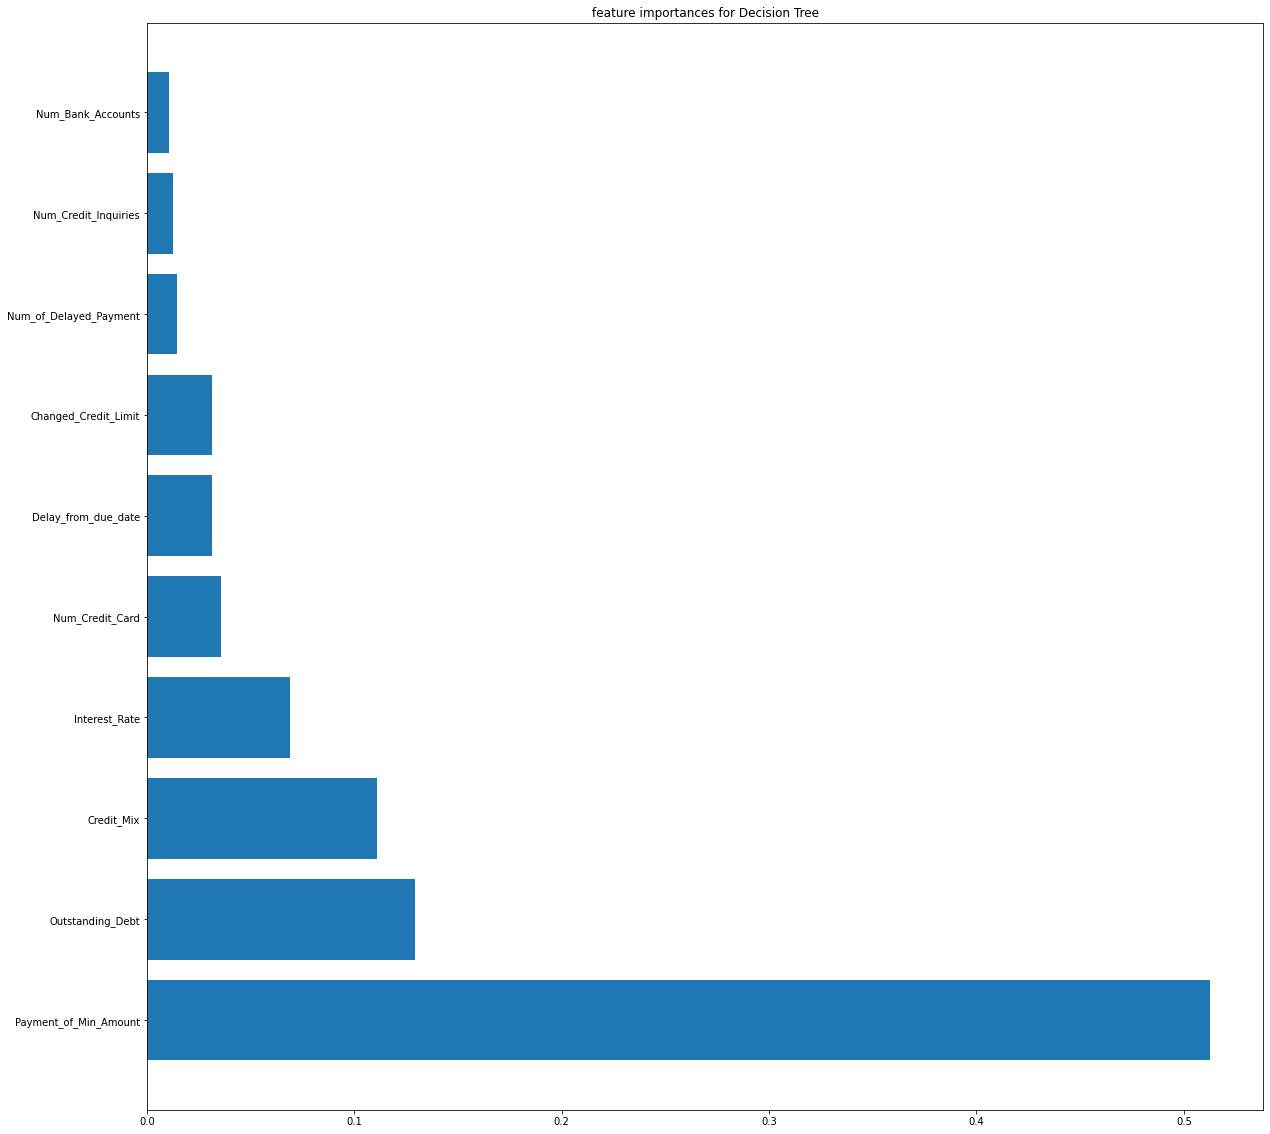

In [ ]:
# Feature importance selection
feature_importance_selection(abs(xgb.feature_importances_), features, top=10)

In [ ]:
# using DMatrix function in xgb for modeling
train_xgb = xgb.DMatrix(x_train_wv, y_train_wv)
valid_xgb = xgb.DMatrix(val_x, val_y)
test_xgb = xgb.DMatrix(x_test, y_test)

In [ ]:

params = {"objective": "multi:softprob",'num_class': 3,
          "eta": 0.10,     # learning rate
          "max_depth": 6,  # default value
          "subsample": 0.5, # default 1, range 0,1
          "silent": 1, 
          "booster" : "gbtree", 
          "eval_metric": "auc", 
          "min_child_weight": 5} 


In [ ]:
'''
# Start to train xgb models
watchlist = [(train_xgb, 'train'), (valid_xgb, 'eval')]
num_boost_round = 300
light_gbm = xgb.train(params, train_xgb, num_boost_round, evals=watchlist, early_stopping_rounds= 20)
'''

"\n# Start to train xgb models\nwatchlist = [(train_xgb, 'train'), (valid_xgb, 'eval')]\nnum_boost_round = 300\nlight_gbm = xgb.train(params, train_xgb, num_boost_round, evals=watchlist, early_stopping_rounds= 20)\n"

In [105]:
xgb.fit(X_train_smo , y_train_smo)

XGBClassifier(learning_rate=0.3, max_depth=6, n_estimators=5,
              objective='multi:softprob', random_state=42)

In [106]:
xgb_score_train_smo = xgb.score(X_train_smo , y_train_smo)

In [107]:
xgb_score_train_smo

0.7395723140333968

In [108]:
xgb_score_test_smo = xgb.score(X_test_smo , y_test_smo)
xgb_score_test_smo

0.7323930418429713

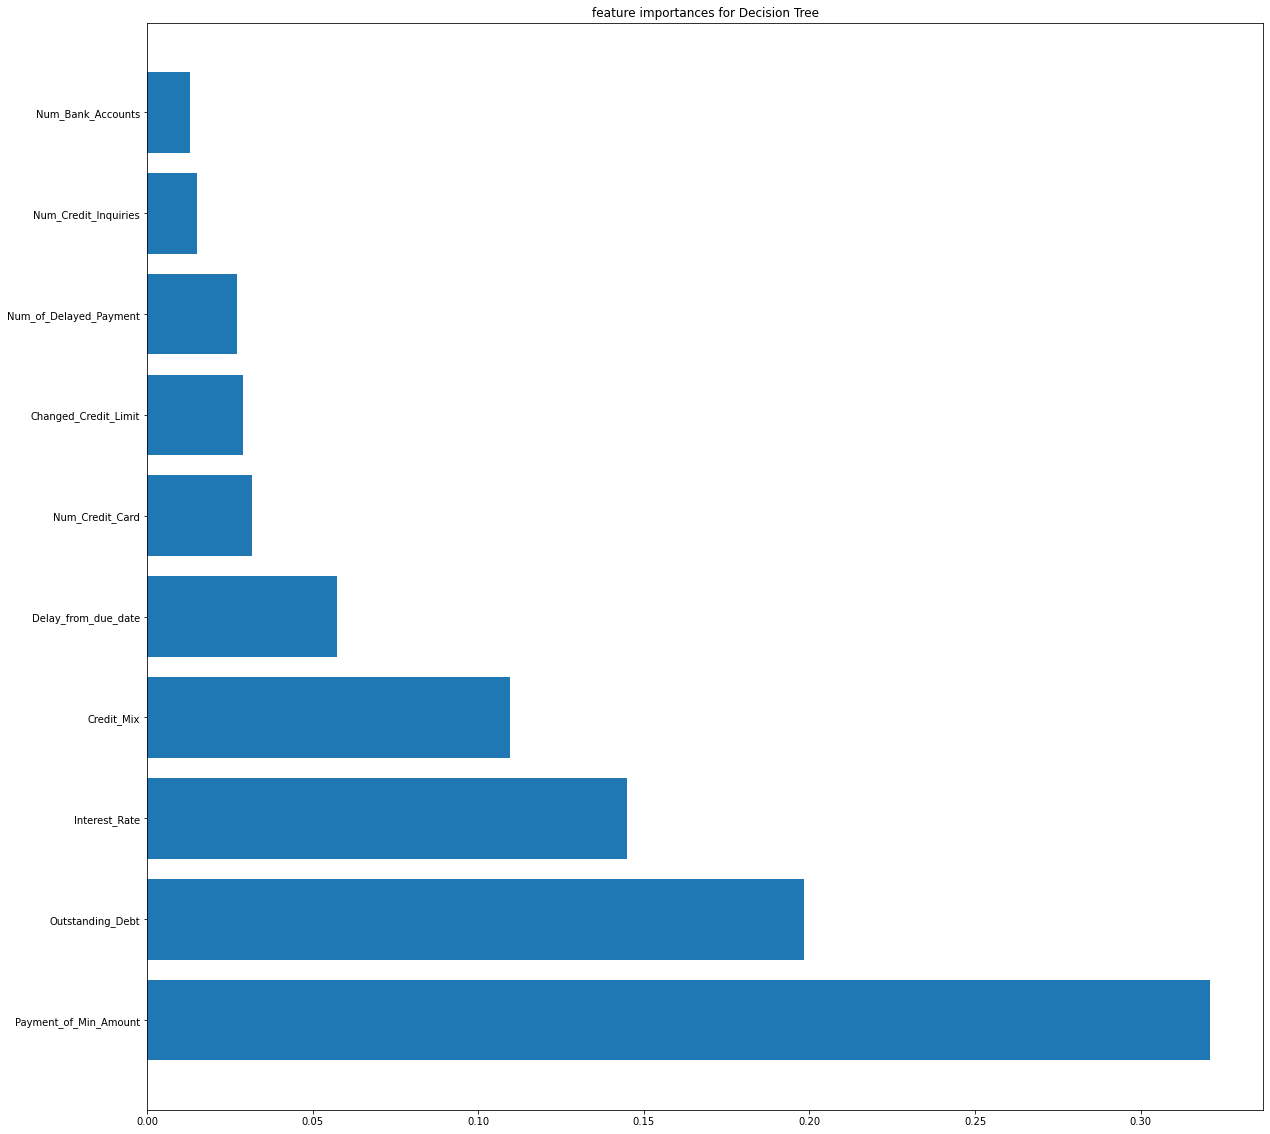

In [126]:
feature_importance_selection(abs(xgb.feature_importances_), features, top=10)

## Ensemble Learning

In [120]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
knn = KNeighborsClassifier(n_neighbors=5)
XGB = XGBClassifier(n_jobs=-1)

model = StackingClassifier([
    ('bagging', bagging),
    ('randomforest', randomForest),
    ('knn', knn),
    ('XGB', XGB)
], n_jobs=-1)

In [121]:
model.fit(X_train_smo, y_train_smo)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


StackingClassifier(estimators=[('bagging', BaggingClassifier(n_jobs=-1)),
                               ('randomforest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('knn', KNeighborsClassifier()),
                               ('XGB', XGBClassifier(n_jobs=-1))],
                   n_jobs=-1)

In [123]:
print("Train Score: ",model.score(X_train_smo, y_train_smo))

Train Score:  0.9999764921601354


In [124]:
print("Test Score: ",model.score(X_test_smo, y_test_smo))

Test Score:  0.861338348221282


In [125]:
from sklearn.metrics import classification_report
y_pred_smo = model.predict(X_test_smo)
print(classification_report(y_pred_smo, y_test_smo))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     11034
           1       0.89      0.87      0.88     10823
           2       0.78      0.82      0.80     10048

    accuracy                           0.86     31905
   macro avg       0.86      0.86      0.86     31905
weighted avg       0.86      0.86      0.86     31905



Thanks so much